# Plotting

CORNETO supports plotting of graphs through different backends, such as Graphviz, Pydot, and NetworkX


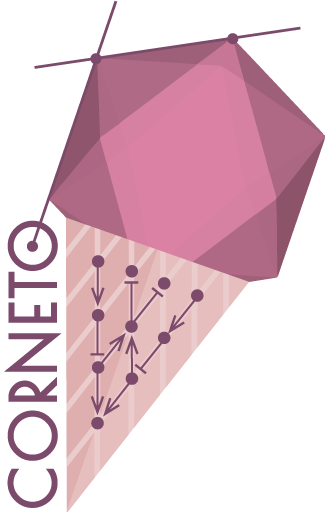

In [1]:
import corneto as cn

cn.info()

## Using graphviz

If graphviz and dot are installed, e.g. via `conda install python-graphviz`, you can use the `plot` method to visualize the graphs

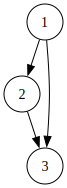

In [2]:
from corneto.graph import Graph

G = Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 3)
G.plot()

In [3]:
# This returns a graphviz object
digraph = G.to_graphviz()
type(digraph)

graphviz.graphs.Digraph

In [4]:
str(digraph)

'digraph {\n\tnode [fixedsize=true]\n\t1 [shape=circle]\n\t2 [shape=circle]\n\t1 -> 2 [arrowhead=normal]\n\t2 [shape=circle]\n\t3 [shape=circle]\n\t2 -> 3 [arrowhead=normal]\n\t1 [shape=circle]\n\t3 [shape=circle]\n\t1 -> 3 [arrowhead=normal]\n}\n'

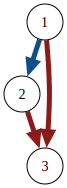

In [5]:
G.plot_values(edge_values=[-1, 1, 1])

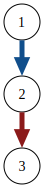

In [6]:
G.plot_values(edge_values=[-1, 1, 1], edge_indexes=[0, 1])

## Using Pydot

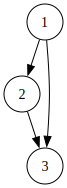

In [7]:
from IPython.display import SVG, display

G_pydot = G.to_dot(backend="pydot")
display(SVG(G_pydot.create_svg()))

## Using NetworkX with Pydot

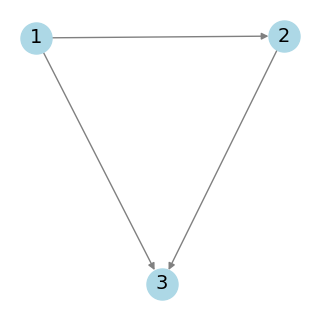

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import from_pydot, graphviz_layout

# Convert pydot to networkx
G_nx = from_pydot(G.to_dot(backend="pydot"))

# Use Graphviz layout (e.g. 'dot' for hierarchies, 'neato' for general layout)
pos = graphviz_layout(G_nx, prog="neato")  # 'neato', 'dot', 'fdp', etc.

# Plot with styling
plt.figure(figsize=(3, 3))
nx.draw(
    G_nx,
    pos,
    with_labels=True,
    arrows=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=500,
    font_size=14,
)
plt.show()